# iris

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

In [2]:
iris_df = pd.read_csv("C:/Users/USER/Desktop/happy_monk/iris.csv")

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#visulization

C:\Users\USER\anaconda3\envs\Keras\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='species', ylabel='count'>

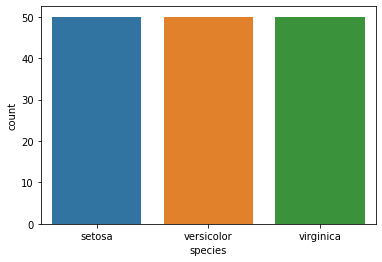

In [7]:
sns.countplot(iris_df['species'])

In [8]:
#iris_df.columns

In [9]:
#iris_new_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [10]:
#iris_new_df.head()

<AxesSubplot:>

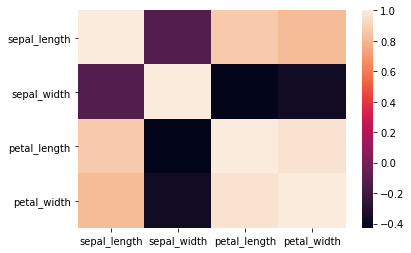

In [11]:
sns.heatmap(iris_df.corr())

In [27]:
#convert the species column to category

In [19]:
def category_iris(x):
    if x == 'setosa':
        return 0
    elif x == 'versicolor':
        return 1
    else :
        return 2

In [20]:
iris_df['species_cat'] = iris_df['species'].apply(category_iris)

In [22]:
iris_df_new = iris_df.copy()

In [25]:
iris_df_new.drop(['species'],axis=1,inplace=True)

In [28]:
#x and y for model

In [50]:
X = iris_df_new.drop(['species_cat'],axis=1).values
y = iris_df_new['species_cat'].values

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [52]:
X_train.shape,X_test.shape

((112, 4), (38, 4))

In [53]:
#scaling the data

In [54]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(X_train)

MinMaxScaler()

In [56]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
#convert to categorical

In [60]:
from keras.utils.np_utils import to_categorical

In [61]:
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

In [62]:
model = Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')

In [63]:
model_history = model.fit(X_train,y_train,epochs=30,verbose=1,validation_data=(X_test,y_test))

Epoch 1/30
4/4 [==============================] - 2s 252ms/step - loss: 0.9976 - accuracy: 0.5296 - val_loss: 0.7072 - val_accuracy: 0.5526
Epoch 2/30
4/4 [==============================] - 0s 49ms/step - loss: 0.5373 - accuracy: 0.7299 - val_loss: 0.5225 - val_accuracy: 0.7632
Epoch 3/30
4/4 [==============================] - 0s 50ms/step - loss: 0.5132 - accuracy: 0.6708 - val_loss: 0.4872 - val_accuracy: 0.7368
Epoch 4/30
4/4 [==============================] - 0s 48ms/step - loss: 0.4397 - accuracy: 0.6827 - val_loss: 0.4886 - val_accuracy: 0.7105
Epoch 5/30
4/4 [==============================] - 0s 63ms/step - loss: 0.4068 - accuracy: 0.7312 - val_loss: 0.4032 - val_accuracy: 0.7632
Epoch 6/30
4/4 [==============================] - 0s 59ms/step - loss: 0.3627 - accuracy: 0.8068 - val_loss: 0.4351 - val_accuracy: 0.7632
Epoch 7/30
4/4 [==============================] - 0s 55ms/step - loss: 0.3140 - accuracy: 0.8475 - val_loss: 0.4076 - val_accuracy: 0.7895
Epoch 8/30
4/4 [==========

In [65]:
model_hist = pd.DataFrame(model_history.history)

<AxesSubplot:>

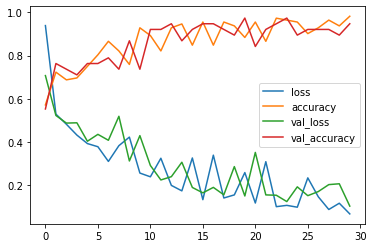

In [66]:
model_hist.plot()

In [77]:
pred_model = model.predict(X_test)

In [78]:
length = len(pred_model)
y_label = np.argmax(y_test,axis=1)
pred_label = np.argmax(pred_model,axis=1)
accuracy = (np.sum(y_label==pred_label)/length)*100

In [79]:
print("accuracy is:",accuracy)

accuracy is: 94.73684210526315


In [67]:
#early stopping implementation

In [80]:
model_early = Sequential()
model_early.add(Dense(1000,input_dim=4,activation='relu'))
model_early.add(Dense(500,activation='relu'))
model_early.add(Dense(300,activation='relu'))
model_early.add(Dense(3,activation='softmax'))
model_early.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')

In [81]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [83]:
model_early_history = model_early.fit(X_train,y_train,epochs=300,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 0s 95ms/step - loss: 0.1494 - accuracy: 0.9464 - val_loss: 0.1135 - val_accuracy: 0.9474
Epoch 2/300
4/4 [==============================] - 0s 51ms/step - loss: 0.1490 - accuracy: 0.9554 - val_loss: 0.1748 - val_accuracy: 0.9211
Epoch 3/300
4/4 [==============================] - 0s 56ms/step - loss: 0.1724 - accuracy: 0.9286 - val_loss: 0.1431 - val_accuracy: 0.9211
Epoch 4/300
4/4 [==============================] - 0s 56ms/step - loss: 0.0843 - accuracy: 0.9643 - val_loss: 0.1085 - val_accuracy: 0.9737
Epoch 5/300
4/4 [==============================] - 0s 63ms/step - loss: 0.0988 - accuracy: 0.9464 - val_loss: 0.3177 - val_accuracy: 0.8158
Epoch 6/300
4/4 [==============================] - 0s 58ms/step - loss: 0.1304 - accuracy: 0.9554 - val_loss: 0.1001 - val_accuracy: 0.9474
Epoch 7/300
4/4 [==============================] - 0s 56ms/step - loss: 0.2151 - accuracy: 0.9018 - val_loss: 0.1101 - val_accuracy: 0.9474
Epoch 8/300
4/4 [===

In [84]:
loss_earlystop = pd.DataFrame(model_early_history.history)

<AxesSubplot:>

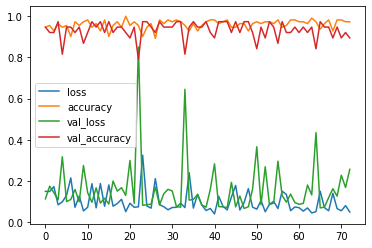

In [85]:
loss_earlystop.plot()

In [87]:
pred_model_earlystop = model_early.predict(X_test)

In [88]:
length = len(pred_model_earlystop)
y_label = np.argmax(y_test,axis=1)
pred_label = np.argmax(pred_model_earlystop,axis=1)
accuracy = (np.sum(y_label==pred_label)/length)*100

In [89]:
print("accuracy is :",accuracy)

accuracy is : 89.47368421052632


In [90]:
#dropout

In [91]:
model_dropout = Sequential()
model_dropout.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dropout(0.5))

model_dropout.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))

model_dropout.add(Dense(300,activation='relu'))
model.add(Dropout(0.5))

model_dropout.add(Dense(3,activation='softmax'))
model_dropout.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')

In [92]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [94]:
model_drop = model_dropout.fit(X_train,y_train,epochs=300,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 2s 200ms/step - loss: 1.0136 - accuracy: 0.4844 - val_loss: 0.7818 - val_accuracy: 0.5526
Epoch 2/300
4/4 [==============================] - 0s 52ms/step - loss: 0.5905 - accuracy: 0.6960 - val_loss: 0.5821 - val_accuracy: 0.5526
Epoch 3/300
4/4 [==============================] - 0s 54ms/step - loss: 0.4795 - accuracy: 0.7068 - val_loss: 0.5122 - val_accuracy: 0.5526
Epoch 4/300
4/4 [==============================] - 0s 50ms/step - loss: 0.3746 - accuracy: 0.7955 - val_loss: 0.5362 - val_accuracy: 0.5526
Epoch 5/300
4/4 [==============================] - 0s 53ms/step - loss: 0.4922 - accuracy: 0.6025 - val_loss: 0.4809 - val_accuracy: 0.6316
Epoch 6/300
4/4 [==============================] - 0s 56ms/step - loss: 0.3610 - accuracy: 0.8098 - val_loss: 0.3752 - val_accuracy: 0.8421
Epoch 7/300
4/4 [==============================] - 0s 49ms/step - loss: 0.4154 - accuracy: 0.8228 - val_loss: 0.7027 - val_accuracy: 0.5526
Epoch 8/300
4/4 [==

4/4 [==============================] - 0s 50ms/step - loss: 0.0926 - accuracy: 0.9555 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 117/300
4/4 [==============================] - 0s 49ms/step - loss: 0.0567 - accuracy: 0.9763 - val_loss: 0.0508 - val_accuracy: 0.9737
Epoch 118/300
4/4 [==============================] - 0s 69ms/step - loss: 0.0693 - accuracy: 0.9793 - val_loss: 0.1674 - val_accuracy: 0.9211
Epoch 119/300
4/4 [==============================] - 0s 55ms/step - loss: 0.0549 - accuracy: 0.9705 - val_loss: 0.0405 - val_accuracy: 0.9737
Epoch 120/300
4/4 [==============================] - 0s 53ms/step - loss: 0.0330 - accuracy: 0.9768 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 121/300
4/4 [==============================] - 0s 53ms/step - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0674 - val_accuracy: 0.9474
Epoch 122/300
4/4 [==============================] - 0s 56ms/step - loss: 0.0537 - accuracy: 0.9799 - val_loss: 0.2095 - val_accuracy: 0.8947
Epoch 123/300
4/4 [=

In [95]:
loss_drop = pd.DataFrame(model_drop.history)

<AxesSubplot:>

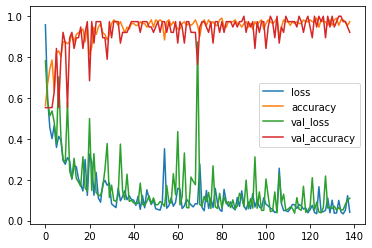

In [96]:
loss_drop.plot()

In [97]:
pred_model_drop = model_dropout.predict(X_test)

In [98]:
length = len(pred_model_drop)
y_label = np.argmax(y_test,axis=1)
pred_label = np.argmax(pred_model_drop,axis=1)
accuracy = (np.sum(y_label==pred_label)/length)*100

In [99]:
print('accuracy:',accuracy)

accuracy: 92.10526315789474
